Breast Cancer Detection Prediction


Data Shapes (569, 31)
Sample Data    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perim

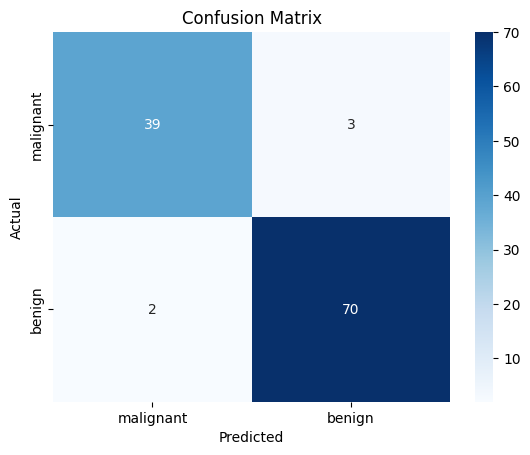

New Patient Prediction malignant


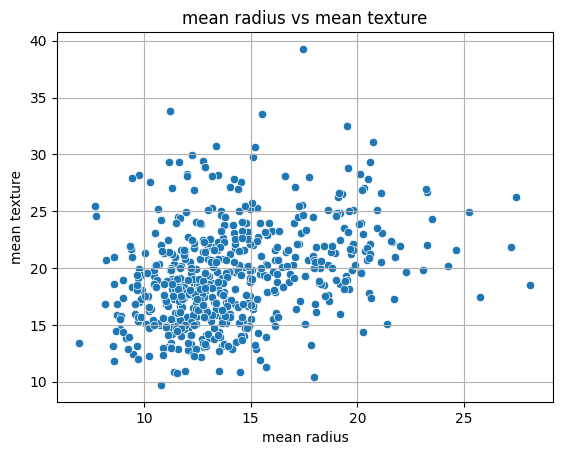

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

#load dataset
data=load_breast_cancer()

df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target #(0->malignant   1->benign)

#exploring the data
print('Data Shapes',df.shape)
print('Sample Data',df.head())
print('Terget classes',data.target_names)

#train-test-split
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

#model training
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

#prediction and evluation
y_pred=model.predict(X_test)

print('classification Report\n',classification_report(y_test,y_pred,target_names=data.target_names))

#Confusion matrices
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,cmap='Blues',xticklabels=data.target_names,yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Predicting the new sample
sample=pd.DataFrame([X.iloc[0]])
pred=model.predict(sample)
print("New Patient Prediction",data.target_names[pred[0]])

#Option visualization
sns.scatterplot(data=df,x='mean radius',y='mean texture')
plt.title('mean radius vs mean texture')
plt.grid(True)
plt.show()